# Nutritional cost efficiency
As someone of a tall stature and an interest in working out, efficient nutrition is a major factor in my personal life. This means that, at the best of times, my food expenses can be significant; especially when trying to restrict myself to healthy food.

The recent(2022) inflation crisis has made it an even more pressing issue, which lead me to the following project idea: Analyse which foods are most cost efficient in regards to their macronutrients and price per 100g.

## Overview of steps
* First, I will detail here how I scrape the Albert Heijn website for data on food, price and macronutrients(macro's).
* Second, I will proceed to import, clean and engineer the data through regex functions and the pandas library.
* Third, I will analyze the data, visualize it and find the most cost efficient foodstuffs to base my personal shopping list on.

## Step 1: The scraping
As a scraping tool, I use the `webscraper.io` chrome extension, for its ease of use and efficiency. In the future, I intend to learn to use scrapy and selenium as well.
The target website will be `ah.nl` because it is the only website that offers product prices as well as their nutritional scores.

The steps of the scraping are as follows:
* I navigate to the website I want to scrape
* I explore the website to get an idea of the general structure. I see that I will need to scrape a list of products, entering each item's page in the list to get the nutritional information, then returning to the list.
* Through exploring the Albert Heijn website and its quirks, I found the most efficient way to iterate through the products is to use the link selector as a parent selector and then to use text selectors for the various attributes I need. I do this for each category of product individually, since this seems to be easiest for this particular website.
* I export the data as a `.csv` file

###  Importing and merging the data
Having scraped the sections of data separately, I examine the data to see if I can effectively clean and wrangle it.

I start by importing the pandas and regex libraries, then uploading the various datasets, examining and looking at the info.

In [34]:
import pandas as pd
import re

set1 = pd.read_csv('albertHeijn-veg-data.csv')
set2 = pd.read_csv('albertHeijn-meat-data.csv')
set3 = pd.read_csv('albertHeijn-meal-data.csv')
set4 = pd.read_csv('albertHeijn-dairy-data.csv')
set5 = pd.read_csv('albertHeijn-cheese-data.csv')
set6 = pd.read_csv('albertHeijn-breakfast-data1.csv')
set7 = pd.read_csv('albertHeijn-breakfast-data2.csv')
set8 = pd.read_csv('albertHeijn-bakery-data.csv')
set9 = pd.read_csv('albertHeijn-snack1-data.csv')
set10 = pd.read_csv('albertHeijn-snack2-data.csv')
set11 = pd.read_csv('albertHeijn-snack3-data.csv')
set12 = pd.read_csv('albertHeijn-snack4-data.csv')
# set13 = pd.read_csv('albertHeijn-bakery-data.csv')

productset = [set1,
              set2,
              set3,
              set4,
              set5,
              set6,
              set7,
              set8,
               set9,
               set10,
               set11,
               set12,
#               set13
]

products = pd.concat(productset, ignore_index=True)
products = products.drop_duplicates(subset='link-selector')

products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 0 to 10784
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   web-scraper-order            6479 non-null   object 
 1   web-scraper-start-url        6479 non-null   object 
 2   link-selector                6478 non-null   object 
 3   link-selector-href           6478 non-null   object 
 4   product-base-price-selector  6477 non-null   float64
 5   product-calorie-selector     6159 non-null   object 
 6   product-fat-selector         6153 non-null   object 
 7   product-carb-selector        6158 non-null   object 
 8   product-price-kilo-selector  5337 non-null   object 
 9   product-protein-selector     6159 non-null   object 
dtypes: float64(1), object(9)
memory usage: 556.8+ KB


Everything is as expected. I can start te cleaning process immediately, since I know the contents of the dataset relatively well. 

I'll start by removing all things that have null in the column of `price-kilo-selector`. Since the goal of the data is to find out which food is most cost efficient *per 100g*, this cannot be done unless there is a price/weight column. Without this, the data is only clutter.

In [16]:
products = products.dropna(subset = ['product-price-kilo-selector'])

products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5336 entries, 0 to 9183
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   web-scraper-order            5336 non-null   object 
 1   web-scraper-start-url        5336 non-null   object 
 2   link-selector                5336 non-null   object 
 3   link-selector-href           5336 non-null   object 
 4   product-base-price-selector  5336 non-null   float64
 5   product-calorie-selector     5277 non-null   object 
 6   product-fat-selector         5271 non-null   object 
 7   product-carb-selector        5276 non-null   object 
 8   product-price-kilo-selector  5336 non-null   object 
 9   product-protein-selector     5277 non-null   object 
dtypes: float64(1), object(9)
memory usage: 458.6+ KB


Seeing that protein now has the most null values, I examine this column to find out more.

In [17]:
products[products['product-protein-selector'].isna()]

,web-scraper-order,web-scraper-start-url,link-selector,link-selector-href,product-base-price-selector,product-calorie-selector,product-fat-selector,product-carb-selector,product-price-kilo-selector,product-protein-selector
21,1665082182-22,https://www.ah.nl/producten/aardappel-groente-...,Verstegen Knoflookpoeder,https://www.ah.nl/producten/product/wi414965/v...,1.69,NaN,NaN,NaN,"Prijs per KG € 37,56",NaN
72,1665082304-73,https://www.ah.nl/producten/aardappel-groente-...,Drogheria Knoflook,https://www.ah.nl/producten/product/wi65767/dr...,2.79,NaN,NaN,NaN,"Prijs per KG € 55,80",NaN
78,1665082318-79,https://www.ah.nl/producten/aardappel-groente-...,AH Luxe wokgroente Japans,https://www.ah.nl/producten/product/wi525249/a...,3.49,NaN,NaN,NaN,"Prijs per KG € 8,73",NaN
106,1665082386-107,https://www.ah.nl/producten/aardappel-groente-...,AH Stoommaaltijd tortellini formaggio XL,https://www.ah.nl/producten/product/wi531273/a...,4.89,NaN,NaN,NaN,"Normale prijs per KG € 11,33",NaN
256,1665082764-257,https://www.ah.nl/producten/aardappel-groente-...,Verstegen Knoflook poeder,https://www.ah.nl/producten/product/wi216639/v...,2.89,NaN,NaN,NaN,"Prijs per KG € 57,80",NaN
330,1665082964-331,https://www.ah.nl/producten/aardappel-groente-...,AH Biologisch Zuurkool,https://www.ah.nl/producten/product/wi525272/a...,1.49,NaN,NaN,NaN,"Prijs per KG € 2,98",NaN
372,1665083072-373,https://www.ah.nl/producten/aardappel-groente-...,AH Smoothie magnesium rood fruit bessen,https://www.ah.nl/producten/product/wi440502/a...,0.99,NaN,NaN,NaN,"Prijs per LT € 3,96",NaN
471,1665083318-472,https://www.ah.nl/producten/aardappel-groente-...,Appels van het seizoen voordeelpakket,https://www.ah.nl/producten/product/wi234268/a...,5.99,NaN,NaN,NaN,"Prijs per KG € 2,00",NaN
492,1665083371-493,https://www.ah.nl/producten/aardappel-groente-...,AH Vers sap ananas meloen mango,https://www.ah.nl/producten/product/wi67839/ah...,2.29,NaN,NaN,NaN,"Prijs per LT € 4,58",NaN
526,1665083453-527,https://www.ah.nl/producten/aardappel-groente-...,Kanzi Appelen zak,https://www.ah.nl/producten/product/wi447162/k...,3.49,NaN,NaN,NaN,"Prijs per KG € 3,49",NaN


The returned rows give several insights:
* most of the products that have no protein also have no other nutritional data either
* navigating to the page of the product, I find that it does mention protein content, but it is very small.

### Cleaning functions

Now I will clean the data and make it useable, primarily using regex functions on each column, starting with the kcal per 100g row.
The easiest way to do this is to define a function, which I can subsequently apply on the column as a whole. I start by defining a function that finds text in the pattern of `(digits)+'Kcal')`, but only gives me the digits part.

In [18]:
def calorie_grabber(text):
    if type(text) != str:
        return None
    calories = re.findall(r'(\d+\.?\d+?) kcal', text)
    if len(calories) < 1:
        return None
    return float(calories[0])

Now the function is defined, I apply it to the original `product-calorie-selector` column and produce a new, clean column labeled `Kcal/100g`.

In [19]:
products['Kcal/100g'] = products['product-calorie-selector'].apply(calorie_grabber)
products

,web-scraper-order,web-scraper-start-url,link-selector,link-selector-href,product-base-price-selector,product-calorie-selector,product-fat-selector,product-carb-selector,product-price-kilo-selector,product-protein-selector,Kcal/100g
0,1665082128-1,https://www.ah.nl/producten/aardappel-groente-...,AH Primeur aardappelen,https://www.ah.nl/producten/product/wi96048/ah...,2.99,371 kJ (88 kcal),Vet0 g,Koolhydraten19 g,"Prijs per KG € 1,99",Eiwitten2 g,88.0
2,1665082133-3,https://www.ah.nl/producten/aardappel-groente-...,AH Vegan zeewiersalade wakame,https://www.ah.nl/producten/product/wi523411/a...,2.39,439 kJ (105 kcal),Vet5.2 g,Koolhydraten11 g,"Prijs per KG € 23,90",Eiwitten1.5 g,105.0
3,1665082136-4,https://www.ah.nl/producten/aardappel-groente-...,Appelsientje Proef! sinaasappel mango kurkuma,https://www.ah.nl/producten/product/wi520760/a...,1.89,173 kJ (41 kcal),Vet0 g,Koolhydraten9.6 g,"Normale prijs per LT € 1,89",Eiwitten0.2 g,41.0
4,1665082139-5,https://www.ah.nl/producten/aardappel-groente-...,AH Paddenstoelengehakt,https://www.ah.nl/producten/product/wi515448/a...,2.49,124 kJ (29 kcal),Vet0.1 g,Koolhydraten4.3 g,"Prijs per KG € 8,30",Eiwitten2.5 g,29.0
5,1665082142-6,https://www.ah.nl/producten/aardappel-groente-...,AH Lunchsalade couscous falafel,https://www.ah.nl/producten/product/wi475648/a...,3.79,610 kJ (147 kcal),Vet9.6 g,Koolhydraten10 g,"Prijs per KG € 12,43",Eiwitten3.7 g,147.0
...,...,...,...,...,...,...,...,...,...,...,...
8525,1665143904-656,https://www.ah.nl/producten/snoep-koek-chips-e...,Milka Mmmax reep melk cheesecake,https://www.ah.nl/producten/product/wi466829/m...,3.25,2205 kJ (528 kcal),Vet29 g,Koolhydraten59 g,"Prijs per KG € 10,83",Eiwitten5.4 g,528.0
9011,1665146006-100,https://www.ah.nl/producten/snoep-koek-chips-e...,Kinder Chocolade,https://www.ah.nl/producten/product/wi124148/k...,2.49,2360 kJ (566 kcal),Vet35 g,Koolhydraten53.5 g,"Prijs per KG € 12,45",Eiwitten8.7 g,566.0
9079,1665146168-168,https://www.ah.nl/producten/snoep-koek-chips-e...,Xylifresh Peppermint gum sugarfree 4-pack,https://www.ah.nl/producten/product/wi480890/x...,2.65,753 kJ (181 kcal),Vet0.9 g,Koolhydraten67 g,"Prijs per KG € 36,81",Eiwitten0 g,181.0
9114,1665146252-203,https://www.ah.nl/producten/snoep-koek-chips-e...,Liga Belvita melk & granen koekjes,https://www.ah.nl/producten/product/wi221045/l...,2.69,1828 kJ (435 kcal),Vet14 g,Koolhydraten66 g,"Prijs per KG € 8,97",Eiwitten7.8 g,435.0


Seeing the function has succesfully been applied to this column, I can use the exact same principle to the other columns. I make some minor alterations to the function to allow the function to parse this particular format of text, but generally it can remain as it is.

In [20]:
def value_grabber(text):
    if type(text) != str:
        return None
    value1 = re.findall(r'(\d+\.?\d+?) g', text)
    if len(value1) < 1:
        return None
    return float(value1[0])

Having formulated the function to properly parse the text in these columns, I can apply it to all three columns individually and create the proper clean columns `fat/100g`, `carbs/100g`, `protein/100g`.

In [21]:
products['fat/100g'] = products['product-fat-selector'].apply(value_grabber)
products['carb/100g'] = products['product-carb-selector'].apply(value_grabber)
products['protein/100g'] = products['product-protein-selector'].apply(value_grabber)
products

,web-scraper-order,web-scraper-start-url,link-selector,link-selector-href,product-base-price-selector,product-calorie-selector,product-fat-selector,product-carb-selector,product-price-kilo-selector,product-protein-selector,Kcal/100g,fat/100g,carb/100g,protein/100g
0,1665082128-1,https://www.ah.nl/producten/aardappel-groente-...,AH Primeur aardappelen,https://www.ah.nl/producten/product/wi96048/ah...,2.99,371 kJ (88 kcal),Vet0 g,Koolhydraten19 g,"Prijs per KG € 1,99",Eiwitten2 g,88.0,NaN,19.0,NaN
2,1665082133-3,https://www.ah.nl/producten/aardappel-groente-...,AH Vegan zeewiersalade wakame,https://www.ah.nl/producten/product/wi523411/a...,2.39,439 kJ (105 kcal),Vet5.2 g,Koolhydraten11 g,"Prijs per KG € 23,90",Eiwitten1.5 g,105.0,5.2,11.0,1.5
3,1665082136-4,https://www.ah.nl/producten/aardappel-groente-...,Appelsientje Proef! sinaasappel mango kurkuma,https://www.ah.nl/producten/product/wi520760/a...,1.89,173 kJ (41 kcal),Vet0 g,Koolhydraten9.6 g,"Normale prijs per LT € 1,89",Eiwitten0.2 g,41.0,NaN,9.6,0.2
4,1665082139-5,https://www.ah.nl/producten/aardappel-groente-...,AH Paddenstoelengehakt,https://www.ah.nl/producten/product/wi515448/a...,2.49,124 kJ (29 kcal),Vet0.1 g,Koolhydraten4.3 g,"Prijs per KG € 8,30",Eiwitten2.5 g,29.0,0.1,4.3,2.5
5,1665082142-6,https://www.ah.nl/producten/aardappel-groente-...,AH Lunchsalade couscous falafel,https://www.ah.nl/producten/product/wi475648/a...,3.79,610 kJ (147 kcal),Vet9.6 g,Koolhydraten10 g,"Prijs per KG € 12,43",Eiwitten3.7 g,147.0,9.6,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8525,1665143904-656,https://www.ah.nl/producten/snoep-koek-chips-e...,Milka Mmmax reep melk cheesecake,https://www.ah.nl/producten/product/wi466829/m...,3.25,2205 kJ (528 kcal),Vet29 g,Koolhydraten59 g,"Prijs per KG € 10,83",Eiwitten5.4 g,528.0,29.0,59.0,5.4
9011,1665146006-100,https://www.ah.nl/producten/snoep-koek-chips-e...,Kinder Chocolade,https://www.ah.nl/producten/product/wi124148/k...,2.49,2360 kJ (566 kcal),Vet35 g,Koolhydraten53.5 g,"Prijs per KG € 12,45",Eiwitten8.7 g,566.0,35.0,53.5,8.7
9079,1665146168-168,https://www.ah.nl/producten/snoep-koek-chips-e...,Xylifresh Peppermint gum sugarfree 4-pack,https://www.ah.nl/producten/product/wi480890/x...,2.65,753 kJ (181 kcal),Vet0.9 g,Koolhydraten67 g,"Prijs per KG € 36,81",Eiwitten0 g,181.0,0.9,67.0,NaN
9114,1665146252-203,https://www.ah.nl/producten/snoep-koek-chips-e...,Liga Belvita melk & granen koekjes,https://www.ah.nl/producten/product/wi221045/l...,2.69,1828 kJ (435 kcal),Vet14 g,Koolhydraten66 g,"Prijs per KG € 8,97",Eiwitten7.8 g,435.0,14.0,66.0,7.8


I move on to clean `product-price-kilo-selector`. To do this, I'm going to have to replace the `,` with a `.`, and divide the total by 10 so I can immediately see the price per 100g/ml.

In [22]:
def price_in_100gram_grabber(text):
    if type(text) != str:
        return None
    cleanprice = text.replace(",",".")
    price = re.findall(r'K?G?L?T? € (\d+\.?\d+?)', cleanprice)
    if len(price) < 1:
        return None
    pricefloat = float(price[0]) 
    return pricefloat/10

Having defined the function to grab the price and clean it, we now apply it to the data.

In [23]:
products['€/100g or ml'] = products['product-price-kilo-selector'].apply(price_in_100gram_grabber)

As a final step, we define a clean, workable dataframe. Using this, we can start the analyses to get the info we want. We also produce two more columns with relevant information for our purposes, namely a column showing the ratio of protein to calories, and a column showing the ratio of protein to cost. As a final touch, we rename a couple of columns to be a bit prettier.

In [26]:
products_clean = products[['link-selector','product-base-price-selector','Kcal/100g', 'fat/100g', 'carb/100g','protein/100g', '€/100g or ml']]
products_clean['protein/Kcal'] = products_clean['protein/100g']/products_clean['Kcal/100g']
products_clean['protein/€'] = products_clean['protein/100g']/products_clean['€/100g or ml']
products_clean.rename(columns={'link-selector':'product name', 'product-base-price-selector': 'base price'}, inplace= True)

C:\Users\Oamoh\AppData\Local\Temp\ipykernel_21812\2599950360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_clean['protein/Kcal'] = products_clean['protein/100g']/products_clean['Kcal/100g']
C:\Users\Oamoh\AppData\Local\Temp\ipykernel_21812\2599950360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_clean['protein/€'] = products_clean['protein/100g']/products_clean['€/100g or ml']
C:\Users\Oamoh\AppData\Local\Temp\ipykernel_21812\2599950360.py:4: SettingWithCopyWarning: 
A value is

This leaves us with a beautiful dataset, as shown below.

In [27]:
products_clean

,product name,base price,Kcal/100g,fat/100g,carb/100g,protein/100g,€/100g or ml,protein/Kcal,protein/€
0,AH Primeur aardappelen,2.99,88.0,NaN,19.0,NaN,0.19,NaN,NaN
2,AH Vegan zeewiersalade wakame,2.39,105.0,5.2,11.0,1.5,2.39,0.014286,0.627615
3,Appelsientje Proef! sinaasappel mango kurkuma,1.89,41.0,NaN,9.6,0.2,0.18,0.004878,1.111111
4,AH Paddenstoelengehakt,2.49,29.0,0.1,4.3,2.5,0.83,0.086207,3.012048
5,AH Lunchsalade couscous falafel,3.79,147.0,9.6,10.0,3.7,1.24,0.025170,2.983871
...,...,...,...,...,...,...,...,...,...
8525,Milka Mmmax reep melk cheesecake,3.25,528.0,29.0,59.0,5.4,1.08,0.010227,5.000000
9011,Kinder Chocolade,2.49,566.0,35.0,53.5,8.7,1.24,0.015371,7.016129
9079,Xylifresh Peppermint gum sugarfree 4-pack,2.65,181.0,0.9,67.0,NaN,3.68,NaN,NaN
9114,Liga Belvita melk & granen koekjes,2.69,435.0,14.0,66.0,7.8,0.89,0.017931,8.764045


<AxesSubplot:xlabel='protein/100g', ylabel='Kcal/100g'>

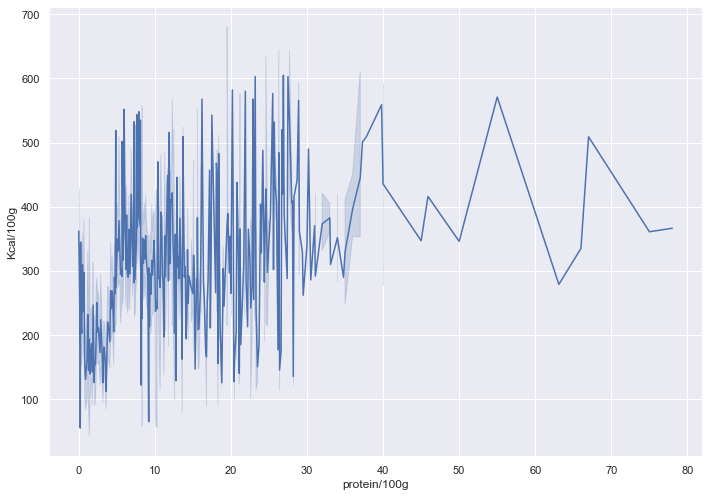

In [35]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=products_clean, x= 'protein/100g', y='Kcal/100g' )

In [71]:
discard = ['meel', 'bloem', 'mix', 'Mix', 'flower']
products_flourless = products_clean[~products_clean['product name'].str.contains('|'.join(discard))]
products_flourless

,product name,base price,Kcal/100g,fat/100g,carb/100g,protein/100g,€/100g or ml,protein/Kcal,protein/€
0,AH Primeur aardappelen,2.99,88.0,NaN,19.0,NaN,0.19,NaN,NaN
2,AH Vegan zeewiersalade wakame,2.39,105.0,5.2,11.0,1.5,2.39,0.014286,0.627615
3,Appelsientje Proef! sinaasappel mango kurkuma,1.89,41.0,NaN,9.6,0.2,0.18,0.004878,1.111111
4,AH Paddenstoelengehakt,2.49,29.0,0.1,4.3,2.5,0.83,0.086207,3.012048
5,AH Lunchsalade couscous falafel,3.79,147.0,9.6,10.0,3.7,1.24,0.025170,2.983871
...,...,...,...,...,...,...,...,...,...
8525,Milka Mmmax reep melk cheesecake,3.25,528.0,29.0,59.0,5.4,1.08,0.010227,5.000000
9011,Kinder Chocolade,2.49,566.0,35.0,53.5,8.7,1.24,0.015371,7.016129
9079,Xylifresh Peppermint gum sugarfree 4-pack,2.65,181.0,0.9,67.0,NaN,3.68,NaN,NaN
9114,Liga Belvita melk & granen koekjes,2.69,435.0,14.0,66.0,7.8,0.89,0.017931,8.764045


In [79]:
products_clean[products_clean['protein/100g']<=50].sort_values(by='protein/Kcal',ascending=False)

,product name,base price,Kcal/100g,fat/100g,carb/100g,protein/100g,€/100g or ml,protein/Kcal,protein/€
976,Morjon Bakkeljauw filet,5.49,76.0,NaN,NaN,19.0,1.56,0.250000,12.179487
1520,John West Tonijnmoot in water msc,2.89,113.0,0.5,NaN,27.0,1.99,0.238938,13.567839
1740,John West Tonijnstukken in water,2.59,113.0,0.5,NaN,27.0,1.78,0.238938,15.168539
974,AH Argentijnse garnaal,8.69,67.0,0.3,NaN,16.0,1.93,0.238806,8.290155
1704,AH Alaska koolvis,2.35,67.0,0.3,0.1,16.0,0.58,0.238806,27.586207
...,...,...,...,...,...,...,...,...,...
7446,Liga Belvita soft bakes koeken,3.19,NaN,15.0,62.0,5.3,31.90,NaN,0.166144
7457,Côte d'Or Bonbonbloc puur chocolade truffel cacao,3.19,NaN,37.0,45.0,5.1,1.67,NaN,3.053892
7484,Côte d'Or Bloc chocolade reep melk hele hazeln...,3.25,NaN,37.0,44.0,9.5,1.80,NaN,5.277778
7938,LU Prince chocolade,1.99,NaN,17.0,69.0,6.4,0.66,NaN,9.696970


In [73]:
products_clean.sort_values(by=['protein/Kcal'], ascending=False)

,product name,base price,Kcal/100g,fat/100g,carb/100g,protein/100g,€/100g or ml,protein/Kcal,protein/€
976,Morjon Bakkeljauw filet,5.49,76.0,NaN,NaN,19.0,1.56,0.250000,12.179487
1520,John West Tonijnmoot in water msc,2.89,113.0,0.50,NaN,27.0,1.99,0.238938,13.567839
1740,John West Tonijnstukken in water,2.59,113.0,0.50,NaN,27.0,1.78,0.238938,15.168539
974,AH Argentijnse garnaal,8.69,67.0,0.30,NaN,16.0,1.93,0.238806,8.290155
1704,AH Alaska koolvis,2.35,67.0,0.30,0.1,16.0,0.58,0.238806,27.586207
...,...,...,...,...,...,...,...,...,...
7996,Delicata Melk macadamia cashew rozijnen,2.49,541.0,34.00,50.0,NaN,1.66,NaN,NaN
8001,AH Strooisnoep,2.49,365.0,0.06,89.0,NaN,0.83,NaN,NaN
8038,Côte d'Or L'original reep melk hazelnoot,2.49,NaN,34.00,49.0,8.8,1.24,NaN,7.096774
8040,AH Snackmix uitdeelzakjes,2.49,NaN,NaN,NaN,NaN,1.13,NaN,NaN


In [83]:
products_clean.sort_values(by=['protein/100g'], ascending=False)

,product name,base price,Kcal/100g,fat/100g,carb/100g,protein/100g,€/100g or ml,protein/Kcal,protein/€
5290,Body & Fit Whey perfection strawberry flavour,24.99,366.0,3.40,5.8,78.0,5.25,0.213115,14.857143
5300,Body & Fit Whey perfection vanilla flavour,24.99,367.0,3.50,5.8,78.0,5.25,0.212534,14.857143
5291,Body & Fit Whey perfection chocolate flavour,24.99,361.0,NaN,4.8,75.0,5.25,0.207756,14.285714
4460,AH Knabbelbacon,1.09,509.0,26.00,1.8,67.0,2.42,0.131631,27.685950
5350,Raw Organic Food Spirulinapoeder,5.19,335.0,NaN,13.0,66.0,2.96,0.197015,22.297297
...,...,...,...,...,...,...,...,...,...
7987,Delicata Wit vlierbloesem,2.49,513.0,29.00,54.0,NaN,1.66,NaN,NaN
7996,Delicata Melk macadamia cashew rozijnen,2.49,541.0,34.00,50.0,NaN,1.66,NaN,NaN
8001,AH Strooisnoep,2.49,365.0,0.06,89.0,NaN,0.83,NaN,NaN
8040,AH Snackmix uitdeelzakjes,2.49,NaN,NaN,NaN,NaN,1.13,NaN,NaN


In [84]:
products_clean.to_excel('products.xlsx')